In [2]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.1/39.5 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/39.5 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.4/39.5 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.6/39.5 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.6/39.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/39.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/39.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/39.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/39.5 MB 2.0 MB/s eta 0:00:20
    --------

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/12.8 MB 21.1 MB/s eta 0:00:01
   - -------------------------------------- 0.5/12.8 MB 15.2 MB/s eta 0:00:01
   - -------------------------------------- 0.5/12.8 MB 15.2 MB/s eta 0:00:01
   - -------------------------------------- 0.5/12.8 MB 15.2 MB/s eta 0:00:01
   - -------------------------------------- 0.5/12.8 MB 15.2 MB/s eta 0:00:01
   - -------------------------------------- 0.5/12.8 MB 15.2 MB/s eta 0:00:01
   - -------------------------------------- 0.6/12.8 MB 2.2 MB/s eta 0:00:06
   - -------------------------------------- 0.6/12.8 MB 2.2 MB/s eta 0:00:06
   - -------------------------------------- 0.6/12.8 MB 2.2 MB/s eta 0:00:06
   - -------------------------------------- 0.6/12.8 MB 2.2 MB/s eta 0:00:06
   - -------------------------------------- 0.6/12.8 MB 2.2 MB/s eta 0:00:06

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data,color,io,img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label,regionprops
from skimage.morphology import closing,square

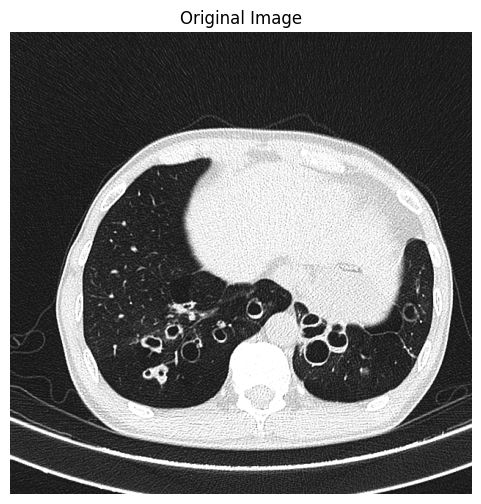

In [21]:
from skimage import data, color
import matplotlib.pyplot as plt

image = io.imread('lung window(image analysis).jpeg')

# Check if the image is already RGB
if image.ndim == 2:  
    # Convert grayscale to RGB 
    image = color.gray2rgb(image) 

gray_image = color.rgb2gray(image)

plt.figure(figsize=(6,6))
plt.imshow(gray_image,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

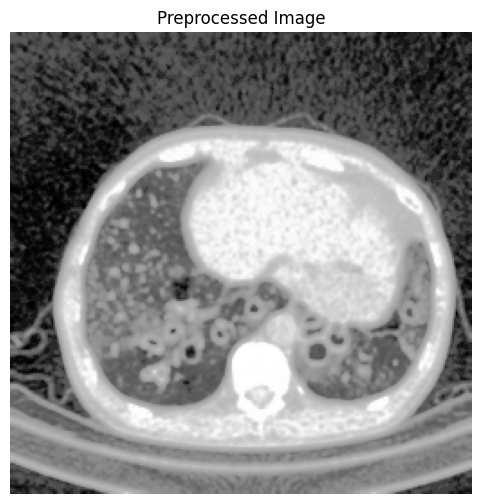

In [24]:
resized_image=cv2.resize(gray_image,(256,256))
denoised_image= cv2.GaussianBlur(resized_image,(5,5),0)
contrast_image=cv2.equalizeHist(img_as_ubyte(denoised_image))
plt.figure(figsize=(6,6))
plt.imshow(contrast_image,cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

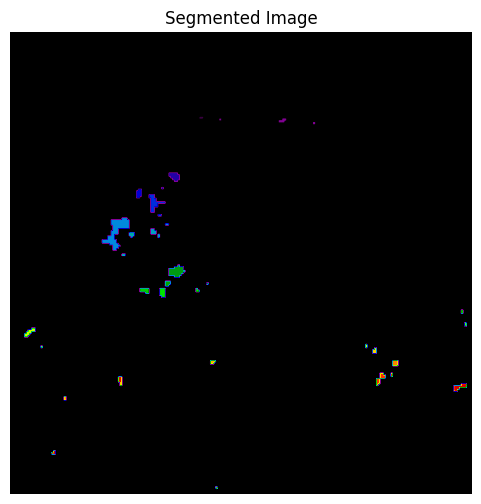

In [27]:
from skimage.morphology import closing, footprint_rectangle

thresh = threshold_otsu(contrast_image)
binary_image = closing(contrast_image > thresh, footprint_rectangle((3, 3)))
cleared = clear_border(binary_image)
label_image = label(cleared)
plt.figure(figsize=(6,6))
plt.imshow(label_image,cmap='nipy_spectral')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

Region 10:Area=102.0,Perimeter=59.59188309203678


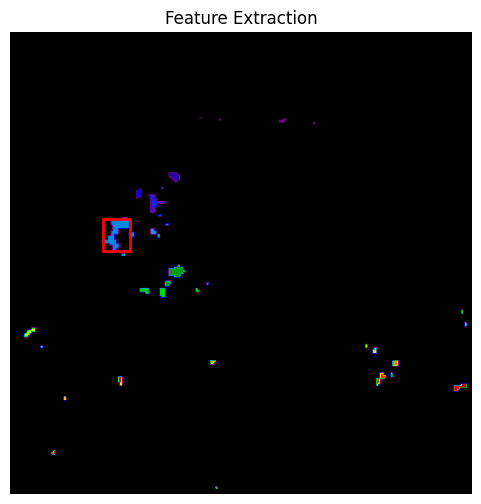

In [33]:
regions=regionprops(label_image)
for region in regions:
    if region.area>=100:
        print(f'Region {region.label}:Area={region.area},Perimeter={region.perimeter}')
plt.figure(figsize=(6,6))
plt.imshow(label_image,cmap='nipy_spectral')
for region in regions:
    if region.area>=100:
        minr,minc,maxr,maxc=region.bbox
        rect=plt.Rectangle((minc,minr),maxc-minc,maxr-minr,fill=False,edgecolor='red',linewidth=2)
        plt.gca().add_patch(rect)
plt.title('Feature Extraction')
plt.axis('off')
plt.show()


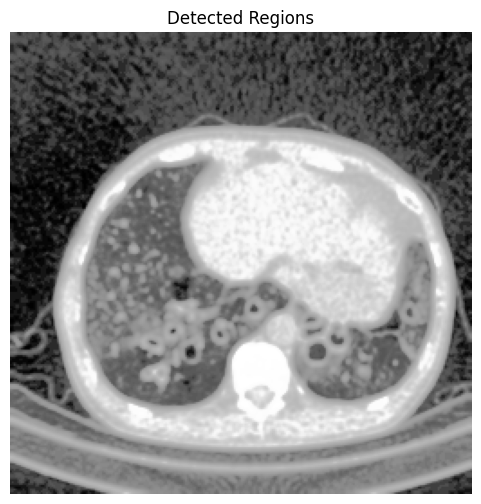

In [31]:
for region in regions:
    if region.area>200:
        print(f'Detected Region {region.label}: Area={region.area},perimeter={region.perimeter}')
        minr,minc,maxr,maxc=region.bbox
        cv2.rectangle(contrast_image,(minc,minr),(maxc,maxr),(255,0,0),2)
plt.figure(figsize=(6,6))
plt.imshow(contrast_image,cmap='gray')
plt.title('Detected Regions')
plt.axis('off')
plt.show()

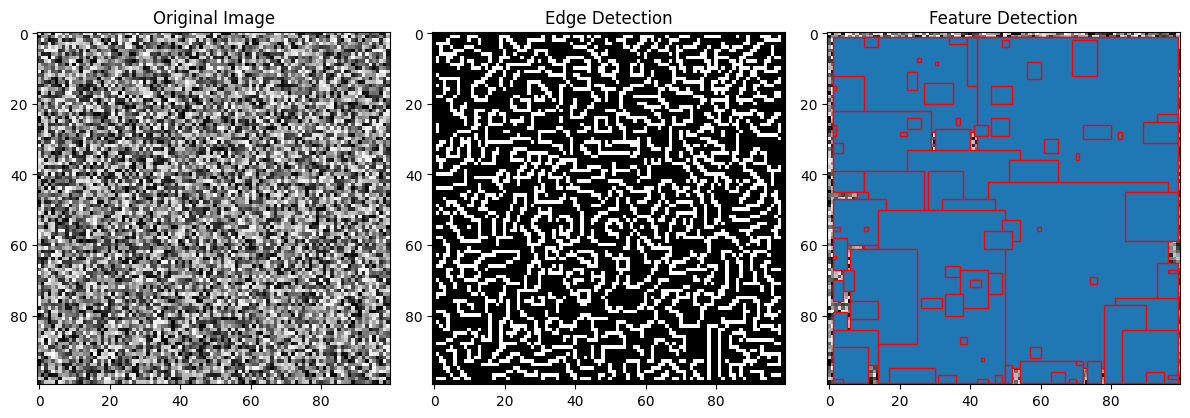

In [41]:
import cv2
import numpy as np
from skimage.feature import canny
from skimage.measure import label, regionprops 
import matplotlib.pyplot as plt

#Generate synthetic biomedical images (grayscale) 
images = [np.random.rand (100, 100) for _ in range (100)] 

#Preprocessing (Gaussian blur)
preprocessed_images = [cv2.GaussianBlur (img, (5, 5), 0) for img in images]

#Segmentation (Canny edge detection)
edges = [canny (img) for img in preprocessed_images]

# Feature extraction and detection (region properties) 
features= [regionprops (label (edge)) for edge in edges] 

#Display sample image, edges, and detected features 

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(images [0], cmap='gray') 
ax[0].set_title('Original Image') 
ax[1].imshow(edges [0], cmap='gray') 
ax[1].set_title('Edge Detection')
ax[2].imshow(images [0], cmap='gray')

for region in features [0]:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle ((minc, minr), maxc - minc, maxr - minr, edgecolor='red')
    ax [2].add_patch (rect)

ax[2].set_title('Feature Detection')
plt.tight_layout()
plt.show()